MODEL COEFFICIENTS:
  enginesize:    4523.40
  horsepower:    1694.22
     citympg:    -392.57
  highwaympg:    -816.36
   Intercept:   13223.41
MODEL PERFORMANCE:
         MSE: 16471505.90
        RMSE:    4058.51
   R-squared:       0.79


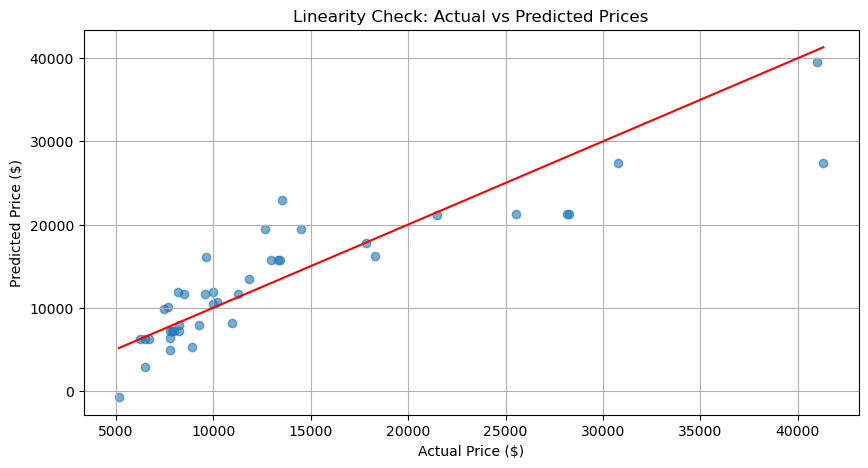


Durbin-Watson Statistic: 2.28 (Values close to 2 indicate no autocorrelation)


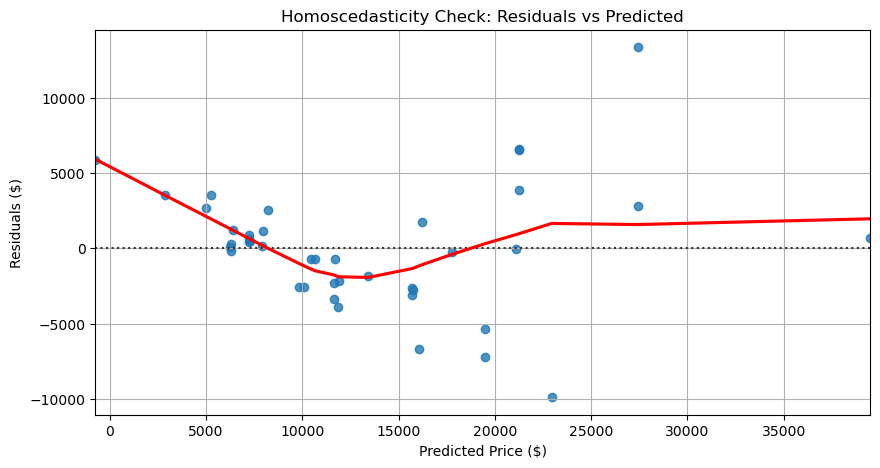

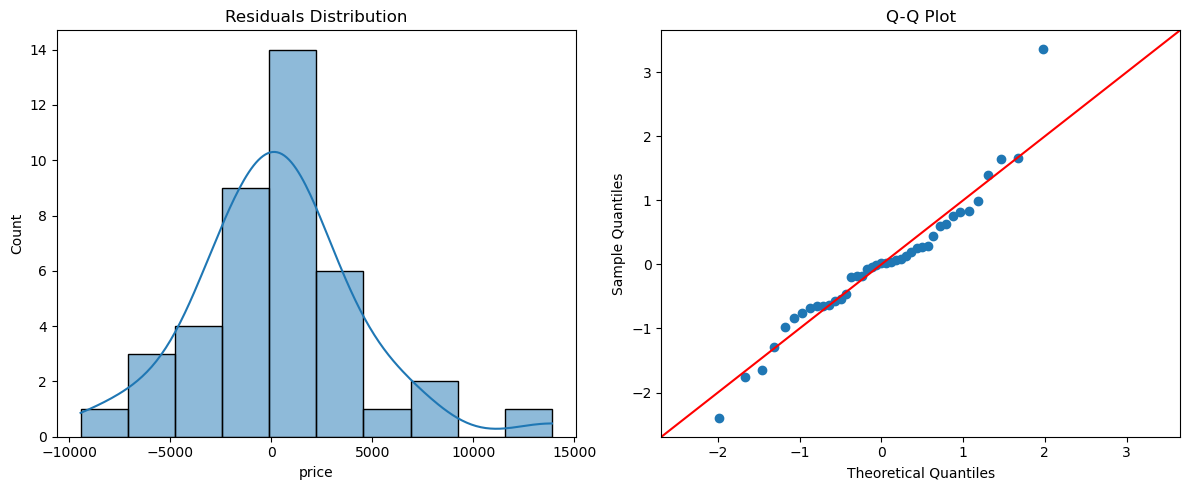

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Load the dataset
df = pd.read_csv("CarPrice_Assignment.csv")

# Select features and target
X = df[['enginesize', 'horsepower', 'citympg', 'highwaympg']]  # Numerical features only
y = df['price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Model coefficients and metrics
print("=" * 50)
print("MODEL COEFFICIENTS:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature:>12}: {coef:>10.2f}")

print(f"{'Intercept':>12}: {model.intercept_:>10.2f}")
print("=" * 50)

# Model performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MODEL PERFORMANCE:")
print(f"{'MSE':>12}: {mse:>10.2f}")
print(f"{'RMSE':>12}: {rmse:>10.2f}")
print(f"{'R-squared':>12}: {r2:>10.2f}")
print("=" * 50)

# 1. Linearity check
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r')
plt.title("Linearity Check: Actual vs Predicted Prices")
plt.xlabel("Actual Price ($)")
plt.ylabel("Predicted Price ($)")
plt.grid(True)
plt.show()

#2.Independence(Durbin-Watson)
residuals = y_test - y_pred
dw_test = sm.stats.durbin_watson(residuals)
print(f"\nDurbin-Watson Statistic: {dw_test:.2f} (Values close to 2 indicate no autocorrelation)")

# 3. Homoscedasticity
plt.figure(figsize=(10, 5))
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.title("Homoscedasticity Check: Residuals vs Predicted")
plt.xlabel("Predicted Price ($)")
plt.ylabel("Residuals ($)")
plt.grid(True)
plt.show()

#4. Normality of residuals
fig, (ax1, ax2)=plt.subplots(1,2,figsize=(12,5))
sns.histplot(residuals,kde=True,ax=ax1)
ax1.set_title("Residuals Distribution")
sm.qqplot(residuals,line='45',fit=True,ax=ax2)
ax2.set_title("Q-Q Plot")
plt.tight_layout()
plt.show()